In [1]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('Clean_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.shape

(300153, 12)

In [5]:
df.drop('Unnamed: 0', axis=1 , inplace=True)

In [6]:
# A Quick Information abou the Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
# Stastical Description of Data

df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
df.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [9]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

Indigo becaming as a most popular Airline

Text(0, 0.5, 'Count')

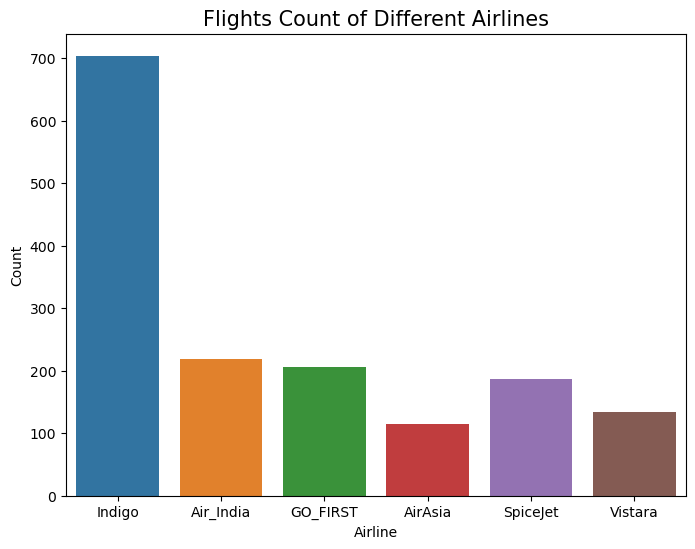

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x=df1['airline'])
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline')
plt.ylabel('Count')


In [11]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

Most of the Airlines has Economic Class as common

In [12]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

Most of the Airlines has Economic Class as common

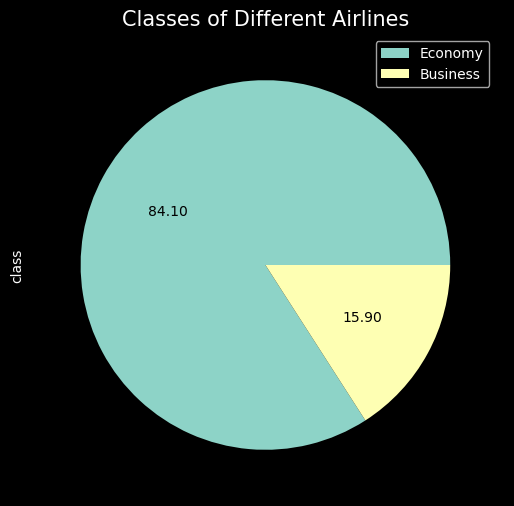

In [32]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'} ,autopct='%.2f')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

### Lets check which airline has the maximum price range

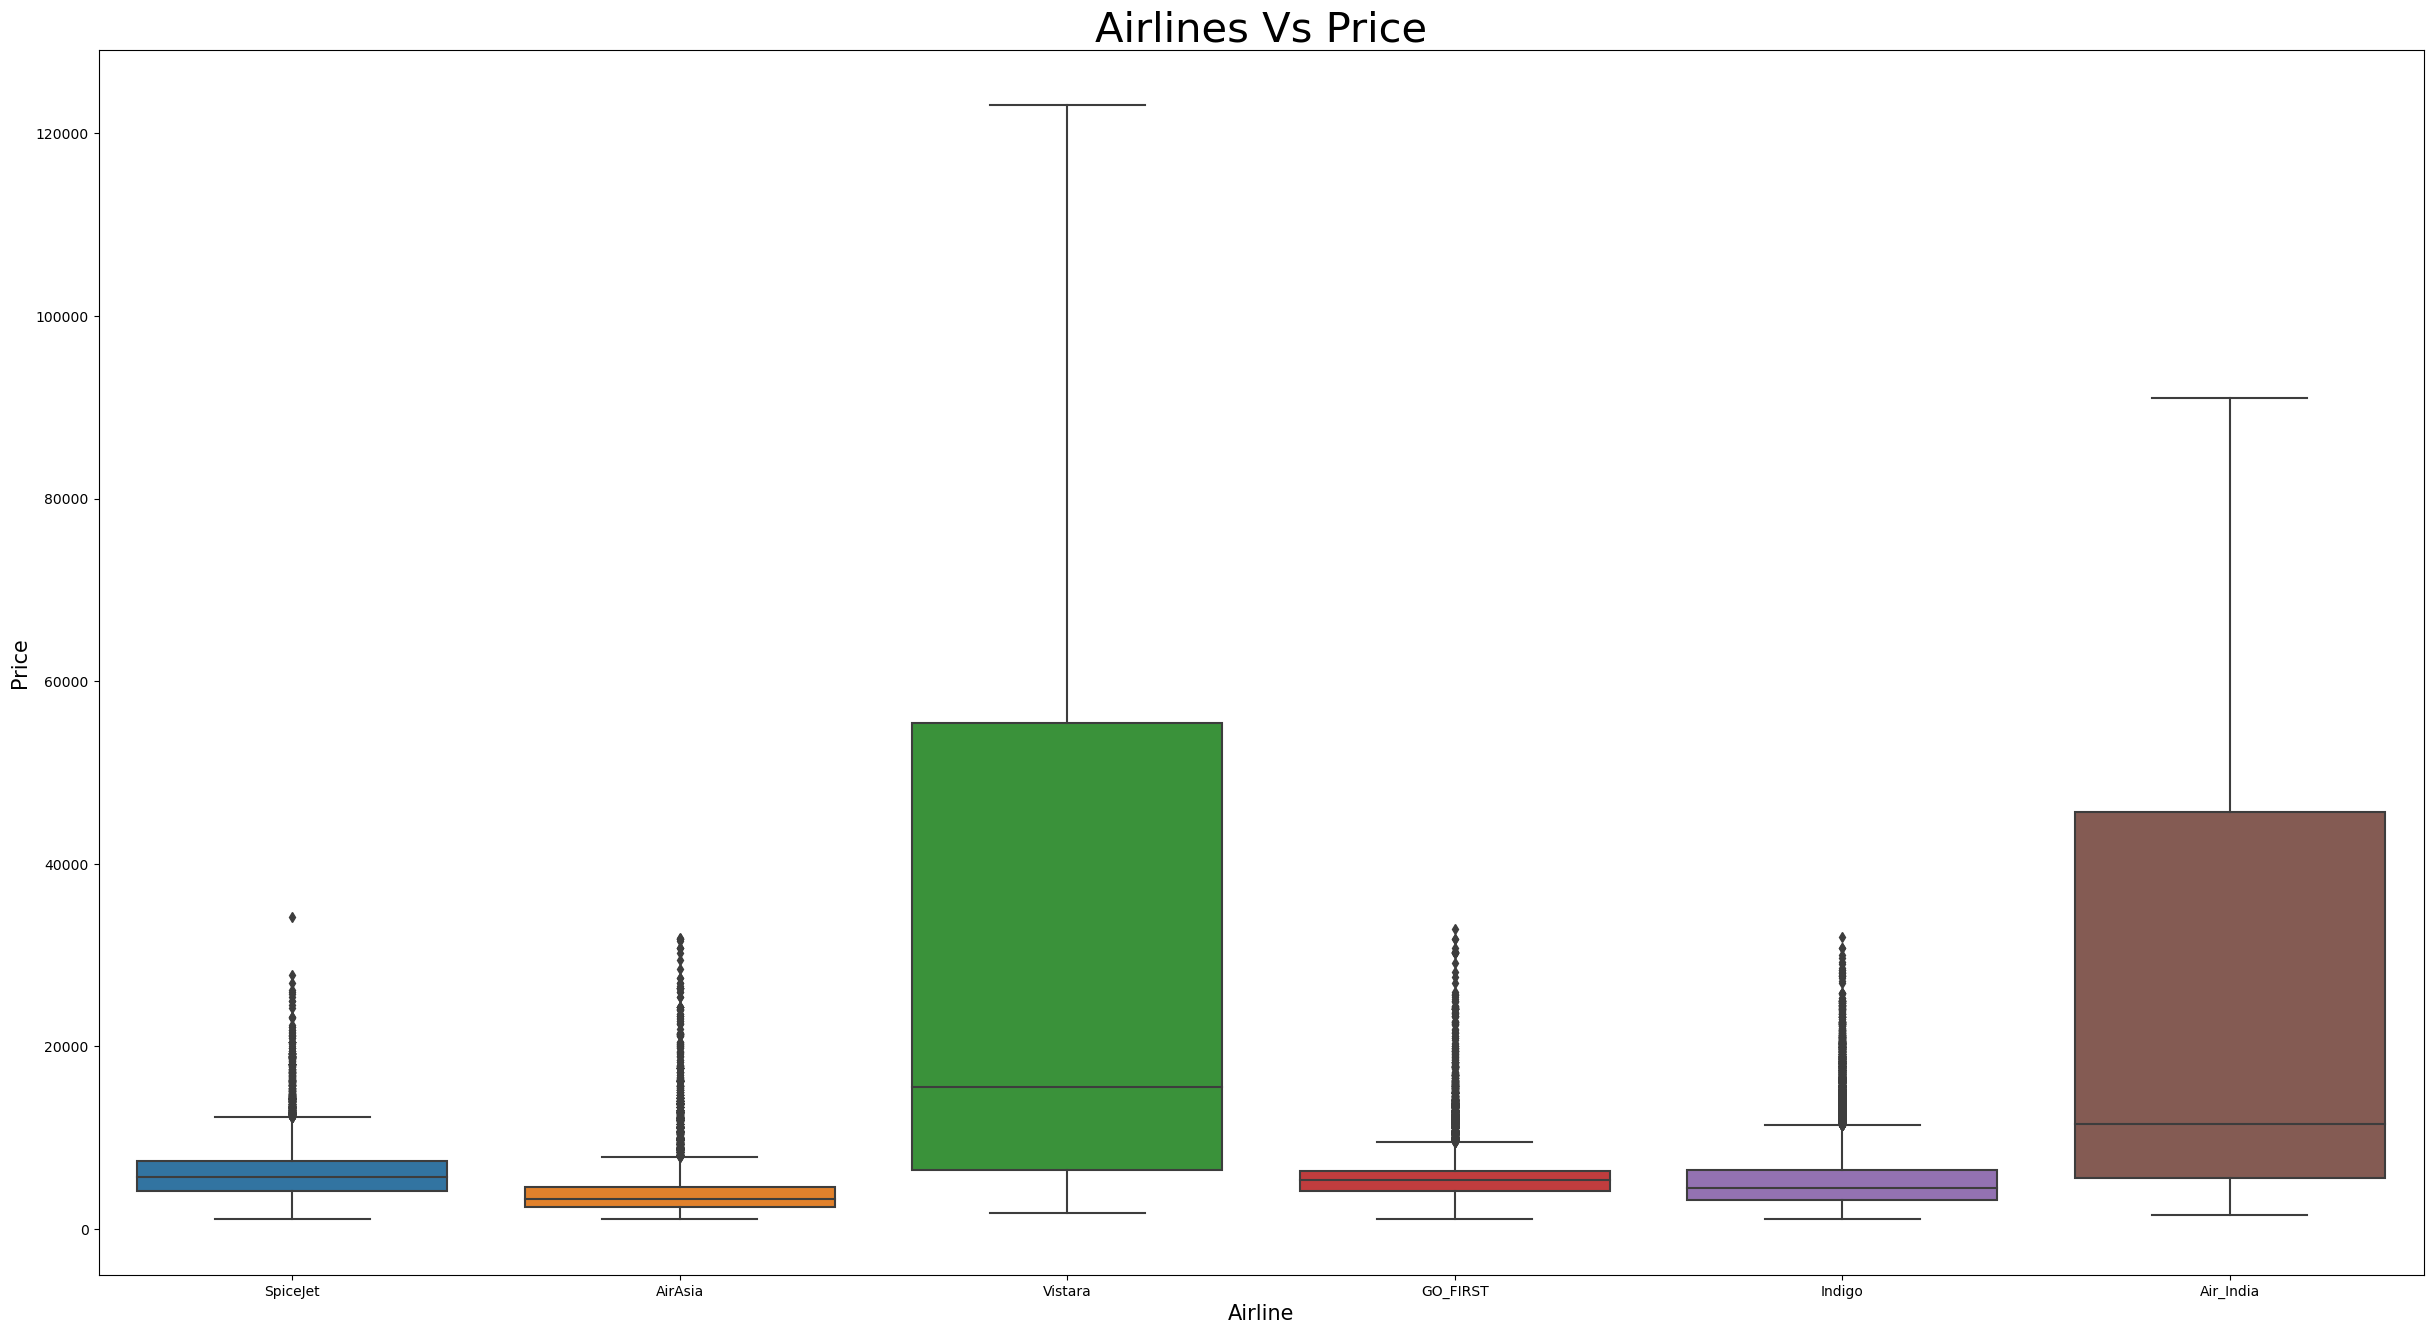

<AxesSubplot:xlabel='price', ylabel='airline'>

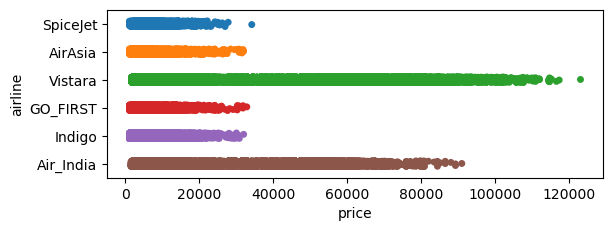

In [14]:
plt.figure(figsize=(30,35))
plt.subplot(2,1,1)
sns.boxplot(x='airline' , y= 'price' , data=df)
plt.title('Airlines Vs Price',fontsize=30)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()
plt.subplot(2,1,2)
sns.stripplot(x='price',y='airline',data=df)


#### Does price vary with Airlines?

As we can see Vistara has Maximum Price range

Vistara and Air_India Airlines Have Maximum Price when compared to Others

SpiceJet , AirAsia , GO_First and Indigo has some what equal prices

### lets check how the ticket price vary between Economy and Business Class?

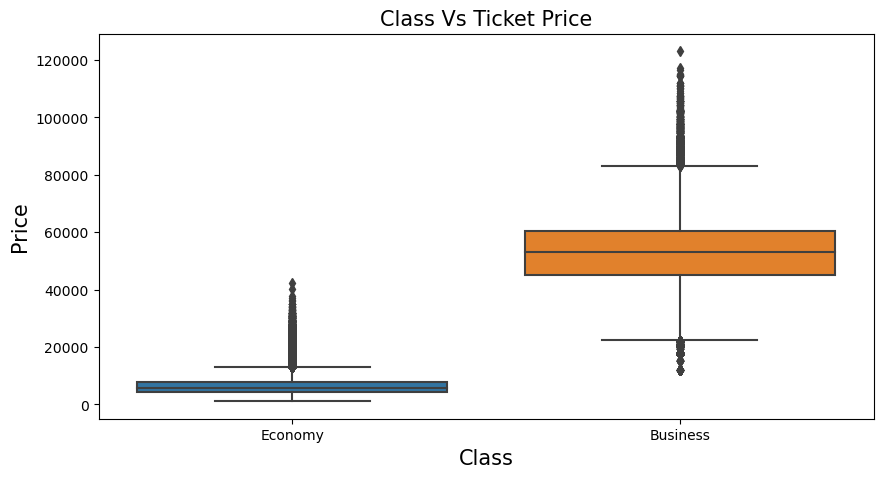

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class', y='price', data=df)
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Ticket Price is Maximum for Bussiness Class When compared to Economy Class

### How Does the Ticket Price vary with the number of stops of a Flight?

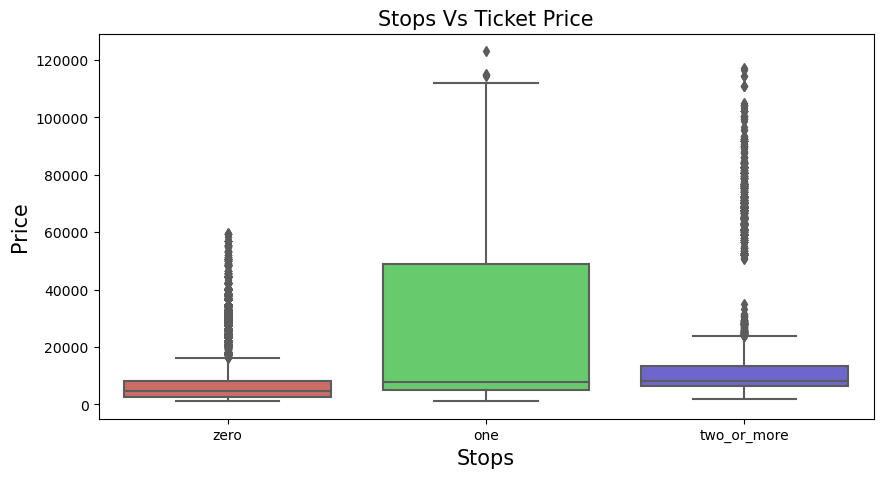

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Flights having one stop has maximum ticket price

### How the Ticket Price change based on the Departure Time?

Text(0, 0.5, 'Price')

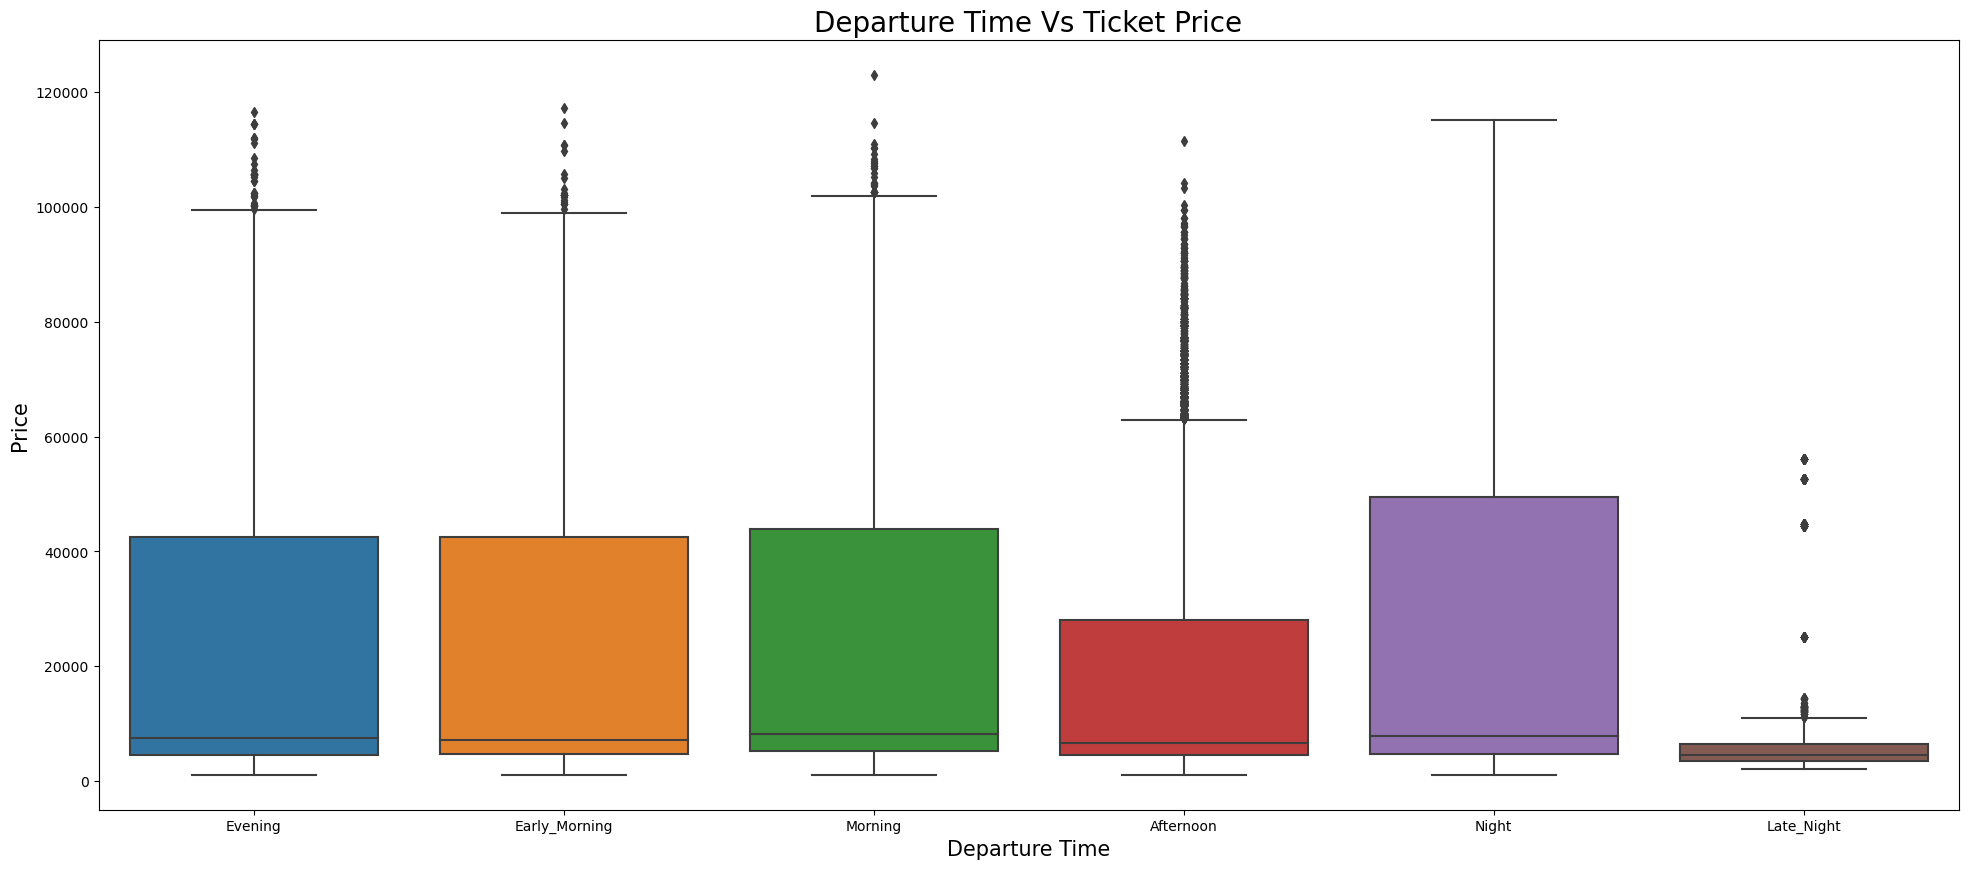

In [17]:
plt.figure(figsize=(24,10))
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)

Departure Time Vs Ticket Price

Ticket Price is More for the Flights when the Departure Time is at Night.

Ticket Price is almost equal for flights Having Departure time at Early_morning| , Morning and Evening.

Ticket Price is Low for the Flights Having Departure Time at Late_night.

### How the Ticket Price change based on the  Arrival Time?

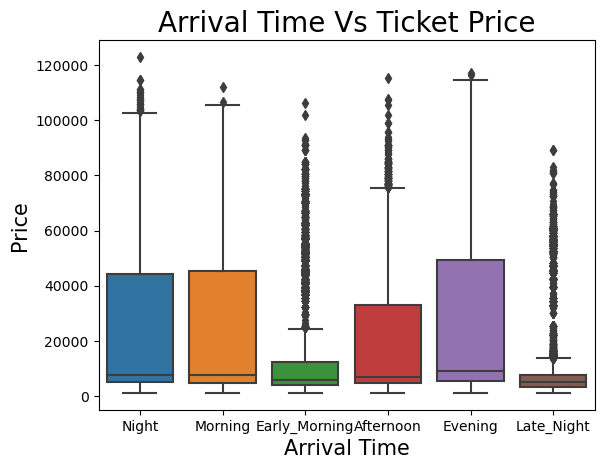

In [18]:

sns.boxplot(x='arrival_time',y='price',data=df)
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Arrival Time Vs Ticket Price

Ticket Price is More for the Flights when the Arrival Time is at Evening

Ticket Price is almost equal for flights Having Arrival time is at Morning and Night

Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time

### How the price changes with change in Source city ?

Text(0, 0.5, 'Price')

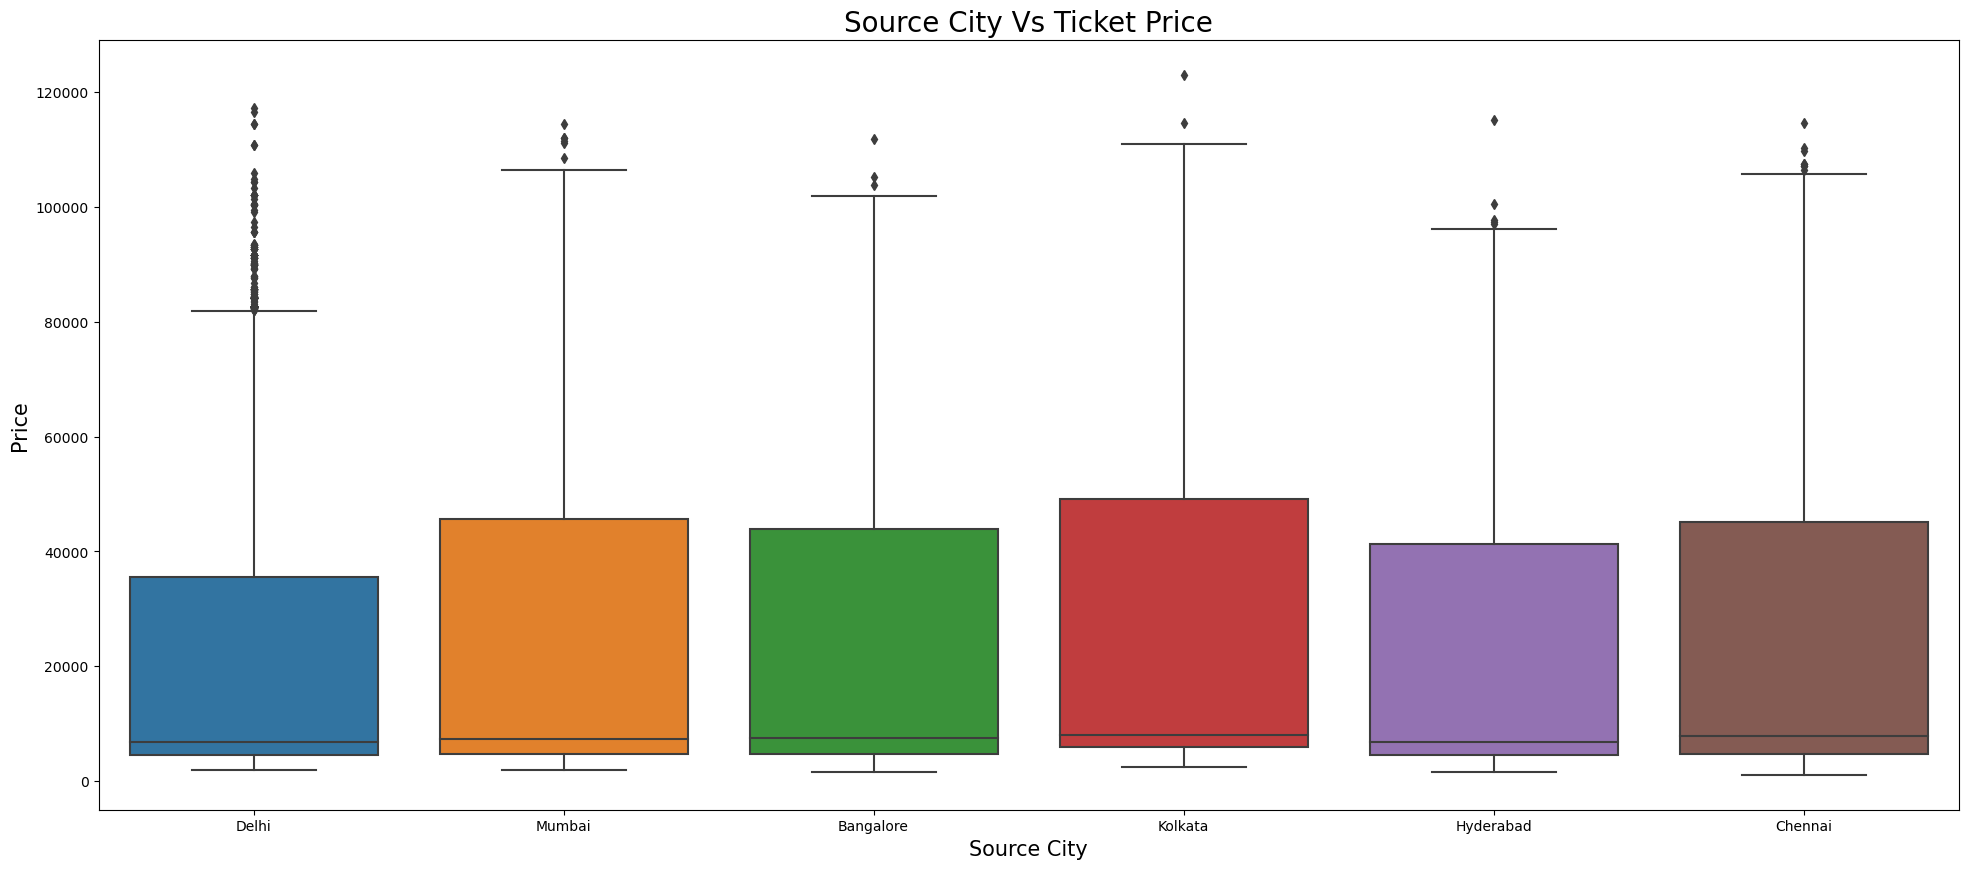

In [19]:
plt.figure(figsize=(24,10))
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)

 Source City Vs Ticket Price

Ticket Price is More for the Flights whose Source City is Kolkata

Ticket Price is almost equal for flights Having Source Cities as Mumbai and chennai , Hyderabad and Bangalore

Ticket Price is Low for the Flights Having Source City as Delhi

### How the price changes with change in  Destination city?

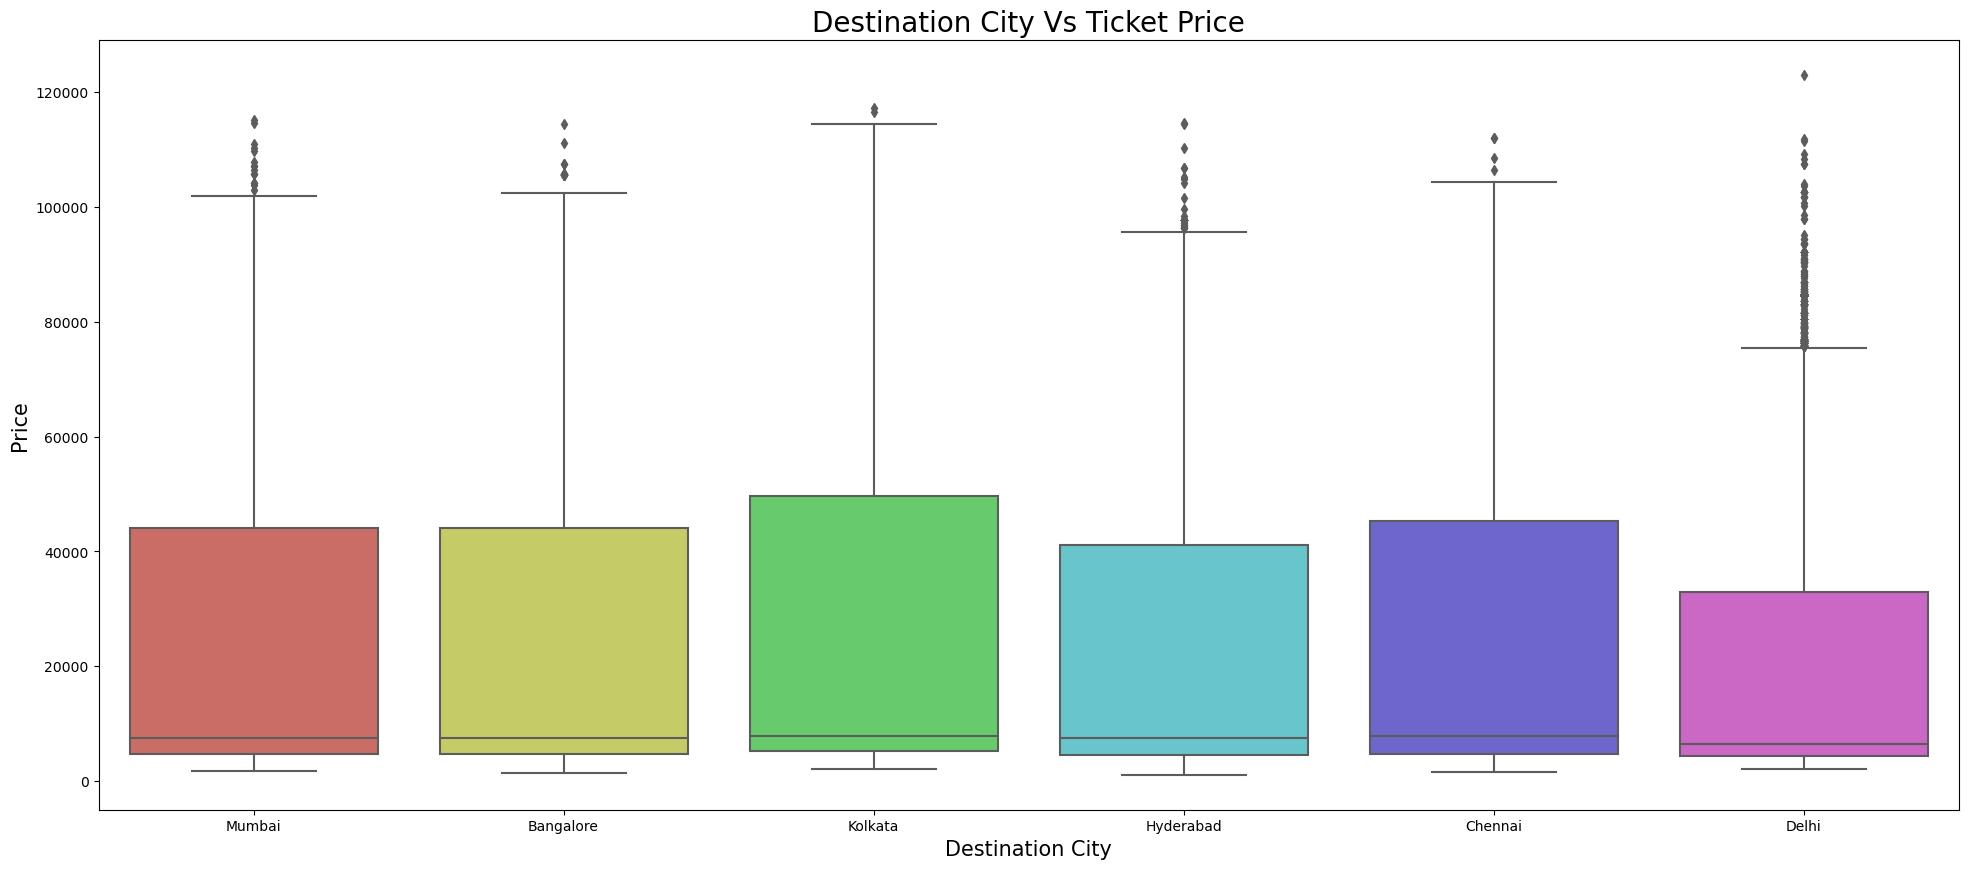

In [20]:
plt.figure(figsize=(24,10))
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

 Destination City Vs Ticket Price
    
Ticket Price is More for the Flights whose Destination City is kolkata and Chennai

Ticket Price is almost equal for flights Having Destination Cities as Mumbai and Bangalore

Ticket Price is Low for the Flights Having Destination City as Delhi

### lets check how does the price varies with flight duration based on class

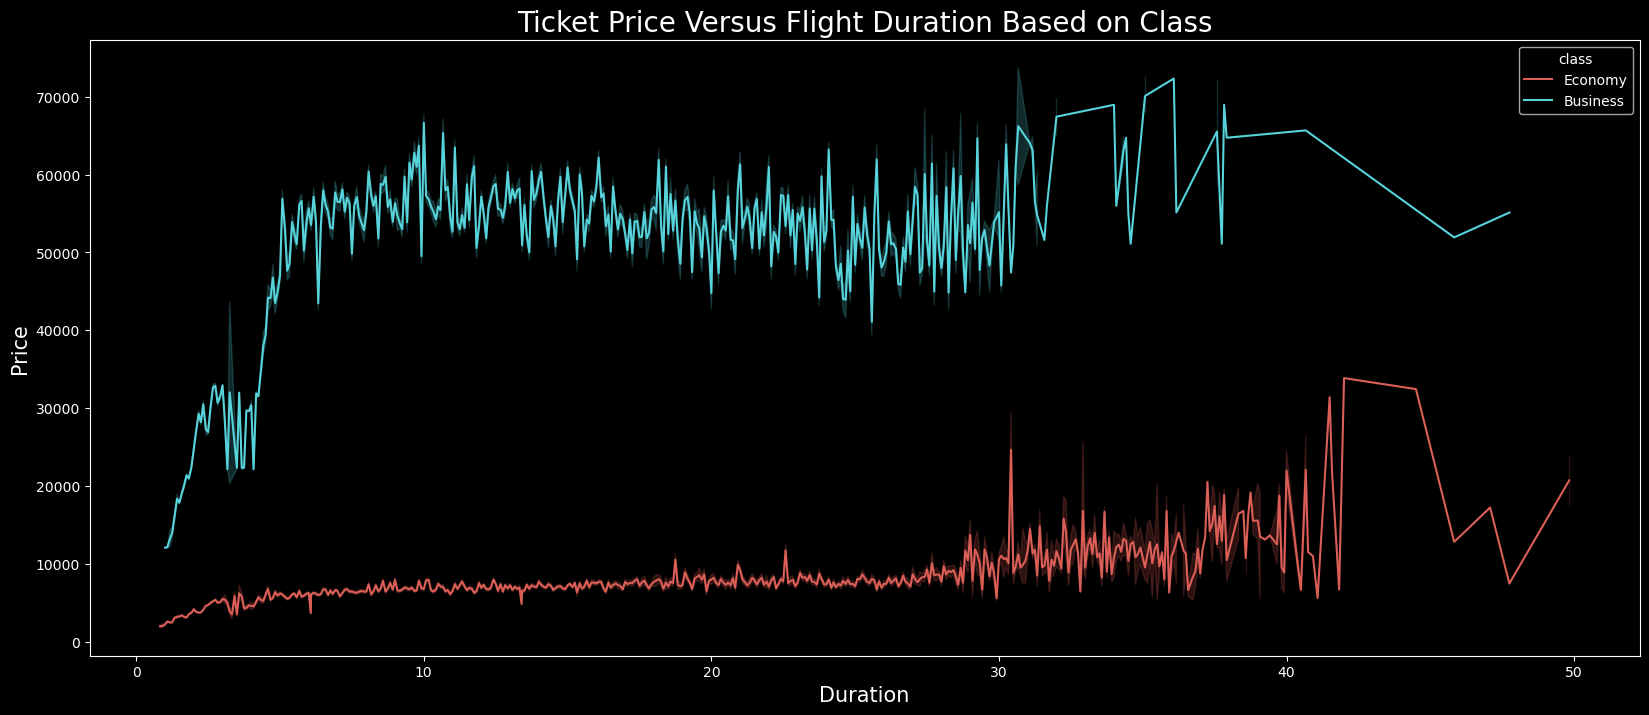

In [21]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

With increase in Duration, the Ticket Price is also Increases In both the Economy and Business classes

### How does the price effect based on the the days left for departure ?

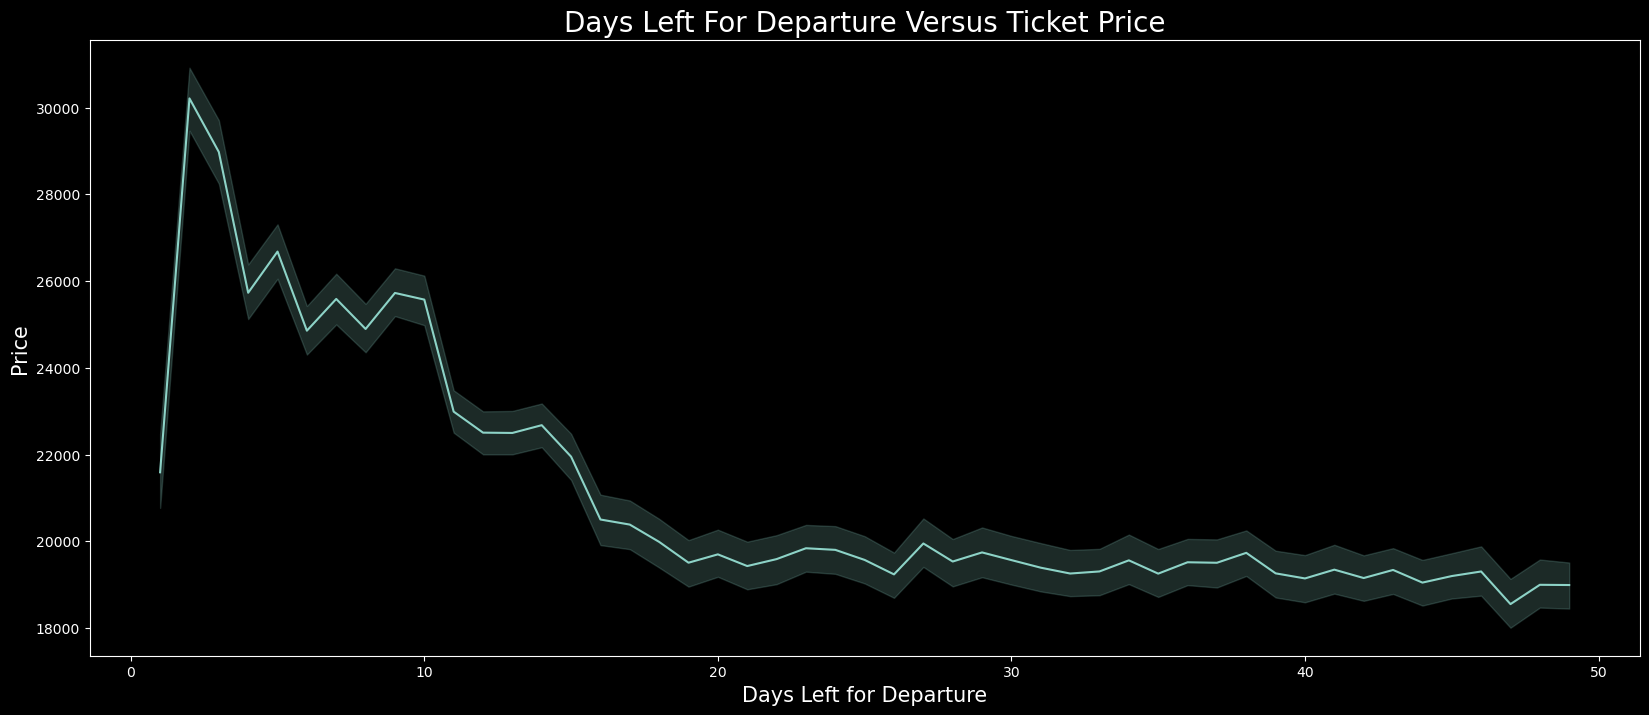

In [22]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(x='days_left' , y='price' , data=df)
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


As we can see when compared to others when there are two days remaining for departure then the Ticket Price is very High for all airlines


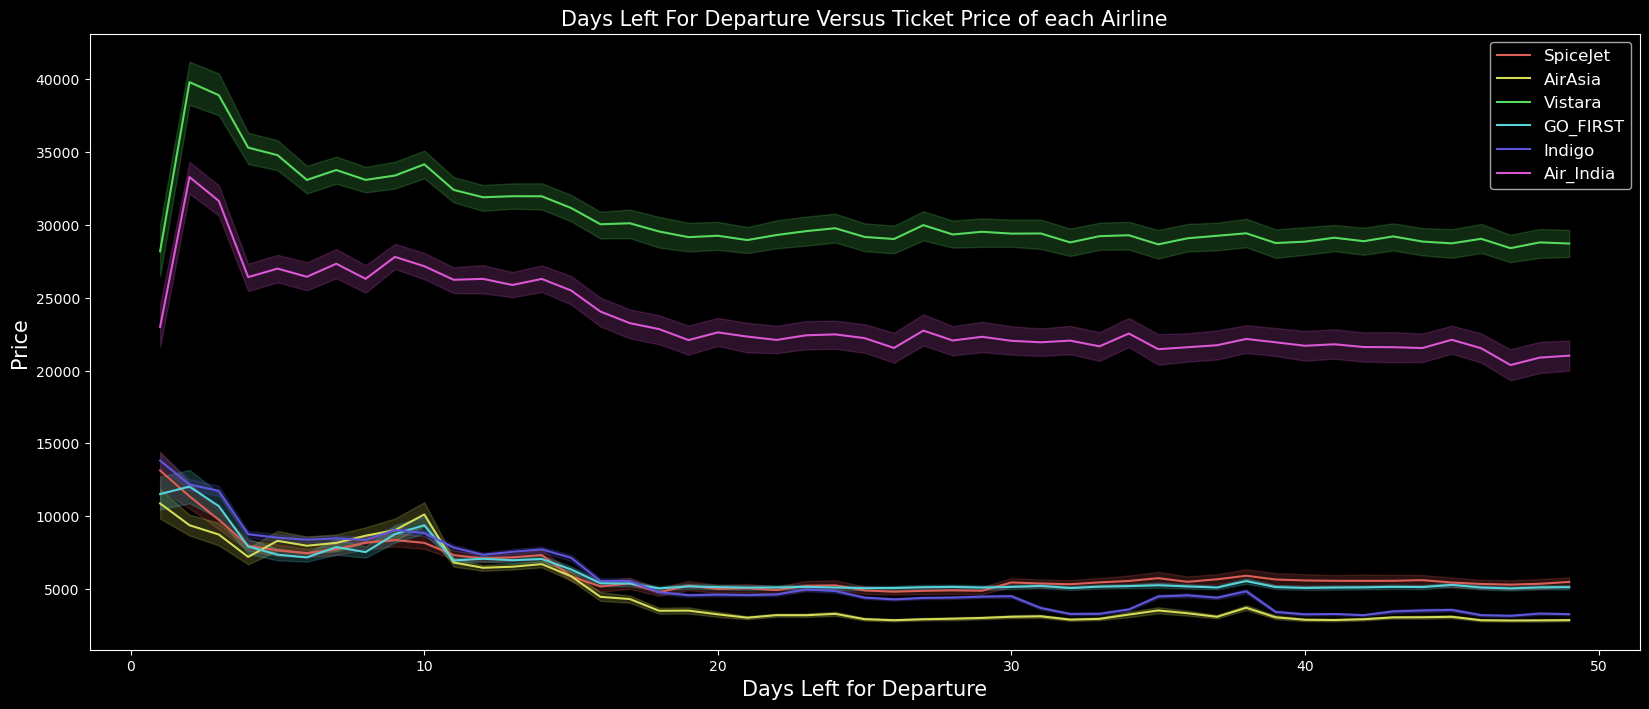

In [23]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [24]:
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


In [25]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean()

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
...,...,...,...,...
172,Vistara,Mumbai,Bangalore,35029.880315
173,Vistara,Mumbai,Chennai,32181.946251
174,Vistara,Mumbai,Delhi,26402.695114
175,Vistara,Mumbai,Hyderabad,29497.578017


Average Price of different Airlnes from Source city to Destination city

### Data Preprocessing and data scaling 

In [26]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [27]:
# storing the Dependent Variables in X and Independent Variable in Y
x=df.drop(['price'],axis=1)
y=df['price']

In [28]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [29]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

## Build the Regression / Regressor models

In [37]:
#LinearRegression

from sklearn.linear_model import LinearRegression
modelmlg = LinearRegression()
modelmlg.fit(x_train,y_train)

y_pred_lg = modelmlg.predict(x_test)



In [39]:
 #Evaluation metrics for Regression analysis

from sklearn import metrics
  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred_lg),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lg)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred_lg),6))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lg))),3))

# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred_lg ),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Squared Error (MSE): 49070241.265
Root Mean Squared Error (RMSE): 7005.015
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Adj R Square:  0.904653


In [43]:
#Ridge Regression

from sklearn.linear_model import Ridge
modelRE=Ridge()
modelRE.fit(x_train,y_train)

y_pred_RE = modelRE.predict(x_test)


In [44]:
#Evaluation metrics for Ridge Regression

  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred_RE),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_RE)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred_RE),6))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred_RE))),3))

# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred_RE ),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Squared Error (MSE): 49070187.277
Root Mean Squared Error (RMSE): 7005.012
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Adj R Square:  0.904653


In [45]:
# ExtraTrees Regressor

from sklearn.ensemble import ExtraTreesRegressor
modelETR = ExtraTreesRegressor()

modelETR.fit(x_train,y_train)

y_pred_ETR = modelETR.predict(x_test)


In [46]:
#Evaluation metrics for ExtraTrees Regressor

  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred_ETR),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_ETR)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred_ETR),6))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred_ETR))),3))

# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred_ETR ),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Squared Error (MSE): 7825813.81
Root Mean Squared Error (RMSE): 2797.466
R2_score: 0.984794
Root Mean Squared Log Error (RMSLE): 7.936
Adj R Square:  0.984793


### From the Above Results,the best model   by comparing Errors , Adj_R_Square and R2_Score values is ExtraTreesRegressor.

#### Training the Data with ExtraTreesRegressor

In [47]:
#Trainig the model with
modelETR.fit(x_train, y_train)
    
# Predict the model with test data

y_pred = modelETR.predict(x_test)

In [48]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df.merge(out,left_index=True,right_index=True)

In [49]:
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
115644,5,1461,0,2,0,5,1,1,25.42,2,18094,18094,14091.63
936,5,1549,2,4,2,4,5,1,2.33,7,5955,5955,6161.73
107569,1,858,0,1,0,2,4,1,13.00,35,6583,6583,6617.72
4688,2,1011,2,5,2,5,5,1,2.25,25,2410,2410,2414.10
195931,5,1490,1,4,1,5,0,1,12.58,28,6437,6437,6436.99
176099,5,1529,3,1,1,2,4,1,10.42,47,9433,9433,9423.86
109188,2,1004,0,2,0,1,4,1,15.17,46,6186,6186,6169.69
251323,1,862,0,5,0,2,5,0,23.00,32,54684,54684,54551.09
11363,5,1559,2,4,0,2,0,1,8.92,9,10680,10680,10942.50
109652,5,1501,0,4,1,2,4,1,10.08,49,11372,11372,11040.55


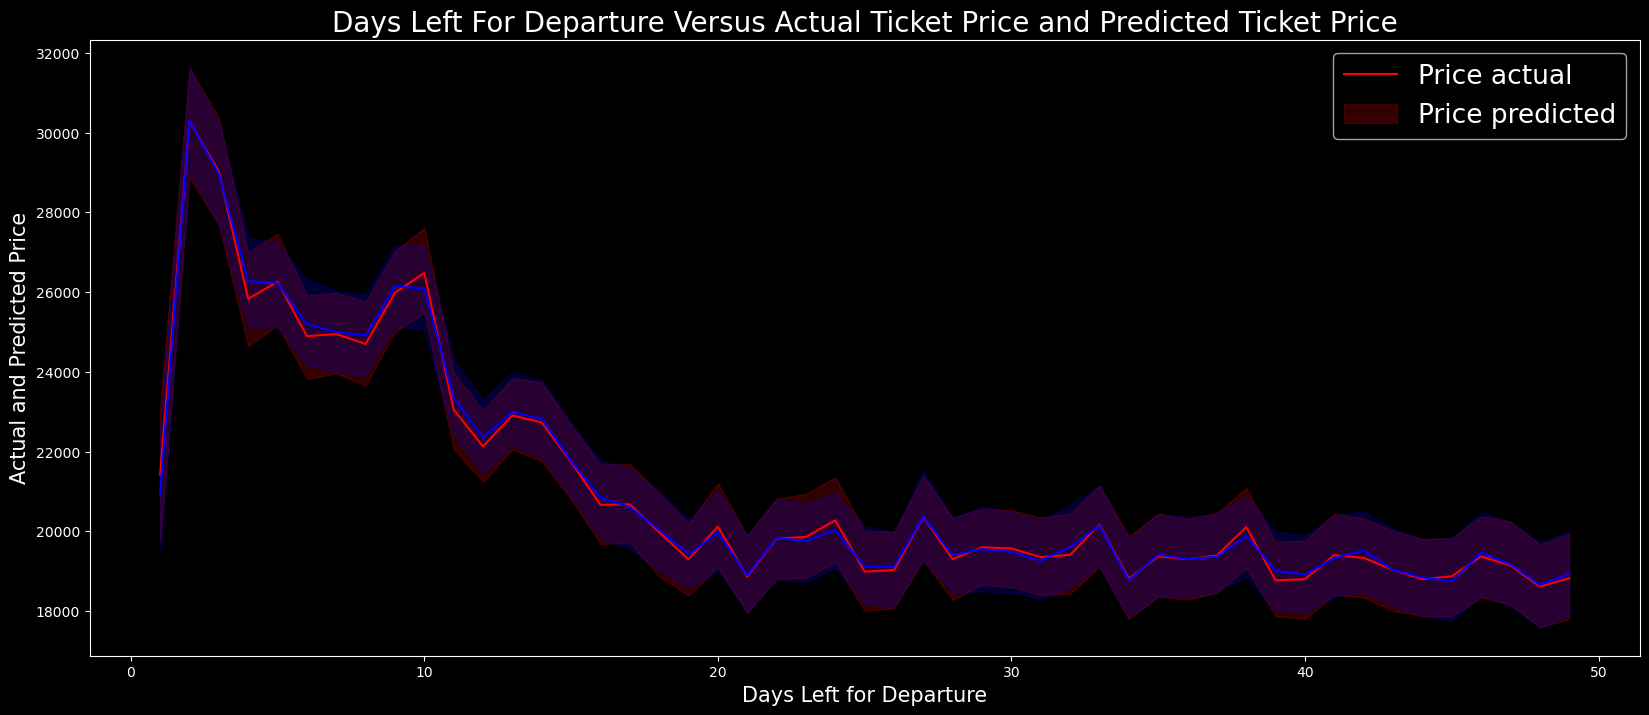

In [56]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

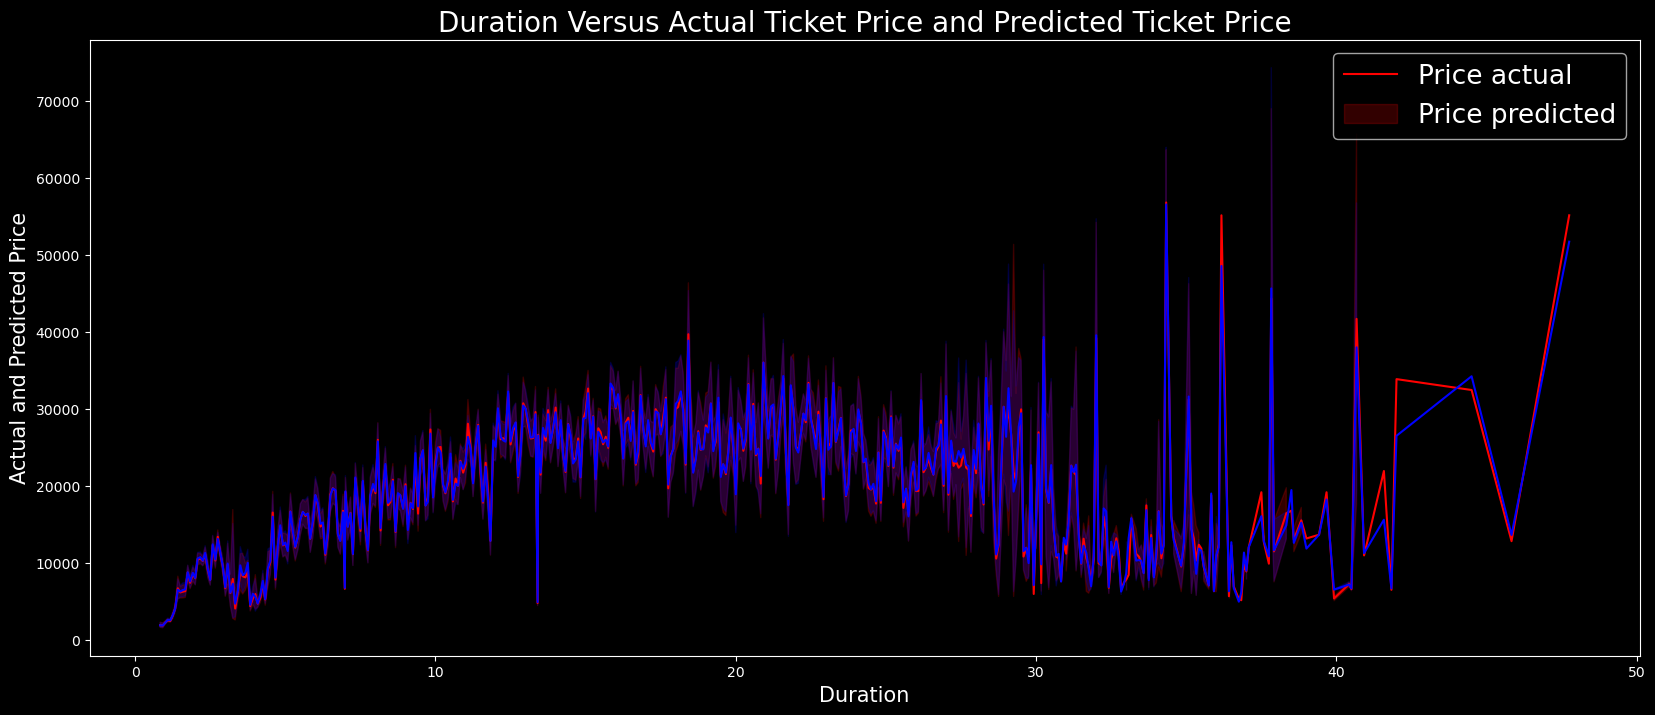

In [54]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='duration',y='Price_actual',color='red')
sns.lineplot(data=result,x='duration',y='Price_pred',color='blue')
plt.title('Duration Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()